# Ensemble Learning

Ensemble Learning is a machine learning technique that combines predictions from multiple models to produce a more accurate and robust result than any individual model could achieve on its own.

Why Use Ensemble Learning?

🔹 Improves accuracy by reducing bias (underfitting) and variance (overfitting).

🔹 Helps in building more stable and generalizable models.

🔹 Often wins machine learning competitions (like Kaggle).

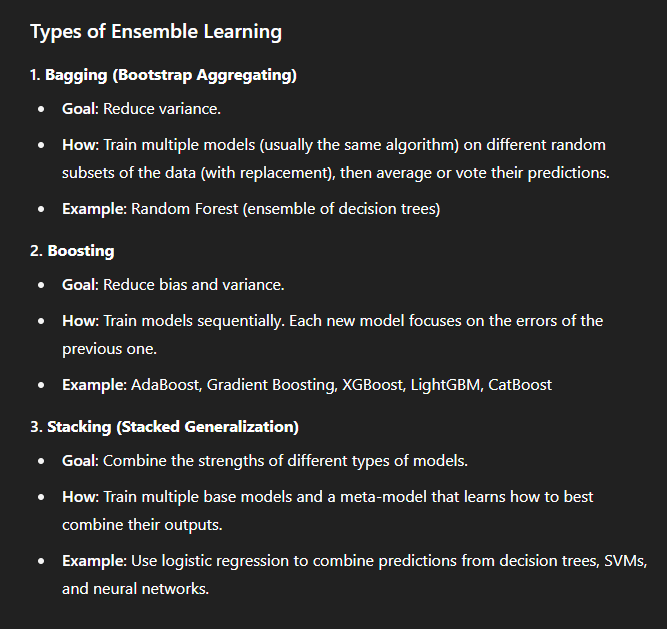

When to Use Ensemble Learning?

🔹Your base models are diverse and each captures different patterns.

🔹You want to improve performance on complex tasks.

🔹You face overfitting/underfitting issues with individual models.

## 1. Bagging

Bagging is an ensemble learning method that trains multiple versions of the same model on random subsets of the dataset (created via bootstrapping), and then aggregates their predictions (by majority vote for classification or averaging for regression).

🧠 Goal: 

Reduce variance (overfitting) by combining multiple weak models into a strong model.

🪜 Step-by-Step Explanation of Bagging
Let’s walk through it with a classification example.

🧩 Suppose:
You have a dataset with 1,000 rows.

You want to train a bagging ensemble of decision trees.

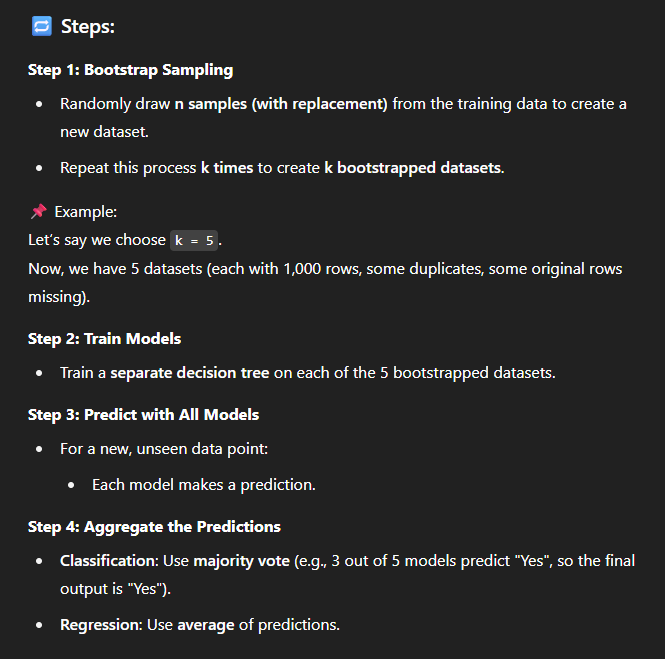

✅ Final Output:

The ensemble model produces a more stable and accurate prediction, as it reduces the chance of one model overfitting.

📦 Real-world Example: Random Forest

1. It’s a classic bagging-based ensemble.

2. Uses decision trees as base learners.

3. Adds extra randomness by selecting a random subset of features at each split.

In [63]:
# Example 1: Diabetes Prediction


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier



# Step 1: Define the Dataset

df = pd.read_csv(r"C:\Users\admin\Downloads\diabetes.csv")
print(df.head())


# Check any Null values

Any_Null = df.isna().sum()
print('\n',Any_Null)


# Describe the Dataset

Describe = df.describe()
print('\n', Describe)


# Value count of the Target

df.Outcome.value_counts()




# Step 2: Initialize the parameters

x = df.drop('Outcome', axis = 1)
y = df.Outcome



# Step 4: Scale the data using Standard Scaler


Scaler = StandardScaler()
x_Scaler = Scaler.fit_transform(x)

print('\n Scaled X Value :', x_Scaler[:3])




# Step 4: Split the data into Train & Test

x_train,x_test,y_train,y_test = train_test_split(x_Scaler,y, test_size = 0.3, stratify=y, random_state = 42)

print('\n X Train Shape :', x_train.shape)
print('\n X Test Shape :', x_test.shape)

print('\n Y Train :', y_train.value_counts())
print('\n Y Test :', y_test.value_counts())



# Step 4: Train using a standalone model

CV = cross_val_score(DecisionTreeClassifier(), x, y, cv = 5)
print('\n Cross Val Score :', CV)
print('\n Model Score :', CV.mean()*100)



# Step 5: Train using Bagging

BC = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 100,
    max_samples = 0.8,   
    oob_score = True,
    random_state = 0
)

BC.fit(x_train,y_train)

print('\n Out Of Bag Score :', BC.oob_score_*100)
print('\n Bagging Score :', BC.score(x_test,y_test)*100)


# Use Cross Validation Score

BCV = cross_val_score(BC, x, y, cv = 5)
print('\n Bagging Cross Val Score :', BCV)
print('\n Bagging Model Score :', BCV.mean()*100)



# Step 4: Train using a Random Forest model

RCV = cross_val_score(RandomForestClassifier(), x, y, cv = 5)
print('\n Random Forest Cross Val Score :', RCV)
print('\n Random Forest Score :', RCV.mean()*100)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

        Pregnanci

In [ ]:
# Example 2: Heart Disease Prediction





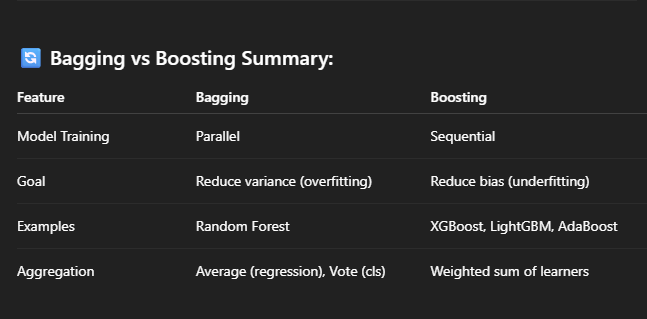